# CINEMA THROUGH DATA SCIENCE
### "'Avalanche Sharks' tells the story of a bikini contest turned into a horrifying affair when it is hit by a shark avalanche."

Cinema is a powerfull tool for comunicating stories. Understanding how those stories are made and more importantly how they relate to one another is as important as it can get in the interconeted world of today.

## PURPOSE

The pourpose of this jupyter notebook is to put into relation the different csv files related to te DAANMO project in order to find the answers to the target questions. As such, the dfs previously cleaned and explored will be imported and analyze in relation with eachother.

Thusly, the analysis will begin by exploring:

    1) The gender difference in the population (actors, directors and producers) across history.
        * Using also cinematic genres in order to see that difference across genres.
    2) The main elements that make up a genre.

Still WIP

In [1]:
# LIBRARIES
import pandas as pd
import numpy as np
import ast


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# CUSTOM FUNCTIONS LIBRARY
import EDA

EDA lib ready


In [3]:
# CSVs
links = pd.read_csv(r'F:\Programacion\1.BOOTCAMP\data\the-movies-dataset\ready_dfs\links_ready.csv')
links_small = pd.read_csv(r'F:\Programacion\1.BOOTCAMP\data\the-movies-dataset\ready_dfs\links_small_ready.csv')
keywords = pd.read_csv(r'F:\Programacion\1.BOOTCAMP\data\the-movies-dataset\ready_dfs\keywords_ready.csv')
actors = pd.read_csv(r'F:\Programacion\1.BOOTCAMP\data\the-movies-dataset\ready_dfs\actors_ready.csv')
producers = pd.read_csv(r'F:\Programacion\1.BOOTCAMP\data\the-movies-dataset\ready_dfs\producers_ready.csv')
directors = pd.read_csv(r'F:\Programacion\1.BOOTCAMP\data\the-movies-dataset\ready_dfs\directors_ready.csv')
writers = pd.read_csv(r'F:\Programacion\1.BOOTCAMP\data\the-movies-dataset\ready_dfs\writers_ready.csv')
genres_unique = pd.read_csv(r'F:\Programacion\1.BOOTCAMP\data\the-movies-dataset\ready_dfs\genres_unique_ready.csv')
genres = pd.read_csv(r'F:\Programacion\1.BOOTCAMP\data\the-movies-dataset\ready_dfs\genres_ready.csv')
dates = pd.read_csv(r'F:\Programacion\1.BOOTCAMP\data\the-movies-dataset\ready_dfs\dates_ready.csv')


print("csvs ready")

csvs ready


The links df will be used in case any other df of this notebook has NaN values in the "id" section. With the hope to cover this gaps and avoid an unnecessary loss of data.

In [4]:
print('NaN in links df')
EDA.null_count(links)
print('\n\nNaN in links_small df')
EDA.null_count(links_small)

NaN in links df
Presence of null in clolumns:
movieId    False
imdbId     False
tmdbId     False
dtype: bool

Number of null in columns:
movieId    0
imdbId     0
tmdbId     0
dtype: int64


NaN in links_small df
Presence of null in clolumns:
movieId    False
imdbId     False
tmdbId     False
dtype: bool

Number of null in columns:
movieId    0
imdbId     0
tmdbId     0
dtype: int64


## 1. Related to actors, directors and producers

The questions raised in the introductory document about the data related to actors, directors and producers (all three groups shall be named participants to allow an easier reading) where:
    
    1) Can it be determined the relationship between participants and the movie's profit, in order to obtain the most bankable star.
        - This includes both popularity and profitablility

    2) Wich actors participants most in the different genres (typecasting).

In order to answer this questions, firtstly the participants csv will be explored in order to determine the gender ratio of its population. Secondly it will be merged with the Links csv, then with the corresponding csvs. Finally the analysis will be presented.

1. Male and Female actors ratio:

In [5]:
actors.columns

Index(['Unnamed: 0', 'id', 'cast_order', 'cast_name', 'gender'], dtype='object')

In [6]:
gender_roles = pd.DataFrame(actors[['cast_order', 'gender']])

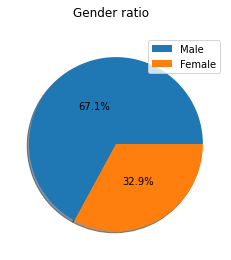

In [7]:
gender_count = gender_roles.gender.value_counts()
labels = gender_count.keys()


# Plotting graph
plt.pie(gender_count,  autopct='%1.1f%%', startangle=0, shadow= True, pctdistance = 0.5, labeldistance = 1.2)
plt.suptitle('Gender ratio', fontsize=12)

# Legend and titles
plt.legend(labels, loc= 'best')
plt.suptitle('Gender ratio', fontsize=12)

plt.show()

The population of actors seems to be quite heavyly slanted towards male actors. It should be noted that this graph does not make any role distinction: extras, secondary characters, protagonists and antagonists are all mixed toguether.

In [8]:
stage1 = gender_roles.groupby('cast_order').gender.value_counts().head(40)
stage1 = list(stage1)

male = []
female = []

for n in range(len(stage1)):
    if (n % 2) == 0:
        male.append(stage1[n])
    else:
        female.append(stage1[n])
print ("Done")

Done


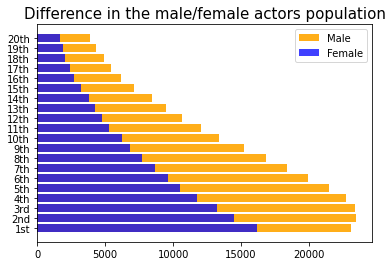

In [9]:
# Data assembly
objects = ['1st', '2nd', '3rd', '4th', '5th', '6th', '7th', '8th','9th', '10th', '11th','12th', '13th', '14th', '15th', '16th', '17th', '18th','19th', '20th']
y_pos = np.arange(len(objects))
data = male
data2 = female

# Creating the plots
plt.barh(y_pos, data, align='center', alpha=0.9, color= 'orange')
plt.barh(y_pos, data2, align='center', alpha=0.75, color= 'blue')
plt.yticks(y_pos, objects, fontsize=10)


# Cretaing labels and titles
plt.title('Difference in the male/female actors population', fontsize=15)
plt.legend(labels, loc= 'best')


plt.show()

As the graph show, a clear divide exists within the male and female acting population across history. Women usually constitute half the number of the male actors. Though a minor improvement can be observed the closer that we get to the 1st billing. This is important, as it shows not only the fact that the representation is far from equitable, but that those areas where it should be most easy to fill and prominent (that of the top 5 billings) are clearly not equitable.

This prompts the question of how this graph may fare across history, since cinema's inception in the 1890's up to the modern age. Also, the genre case is worth studying: as the case could be made that women are mostly (or even only) in a meaningfull number in the 1-5 billings when the genre is specifically marketed towards them.

### 1.1. Gender across film genres

In [10]:
print(f'genre df head:\n{genres.head(1)}\nNulls in genre df: {genres.id.isnull().any()}\n\nactors df head:\n{actors.head(1)}\nNulls in actors df: ')

print

genre df head:
   Unnamed: 0   id                      genre
0           0  862  Animation, Comedy, Family
Nulls in genre df: False

actors df head:
   Unnamed: 0   id  cast_order  cast_name gender
0           1  862         1.0  Tim Allen   Male
Nulls in actors df: 


<function print>

In [11]:
dfgu = genres_unique            # for easier typing, genres_unique will be renamed to dfgu

print(actors.columns)
actors = actors.drop('Unnamed: 0', axis=1)
print(actors.columns)

print(producers.columns)
producers = producers.drop('Unnamed: 0', axis=1)
print(producers.columns)

print(directors.columns)
directors = directors.drop('Unnamed: 0', axis=1)
print(directors.columns)

print(writers.columns)
writers = writers.drop('Unnamed: 0', axis=1)
print(writers.columns)

print(genres.columns)
genres = genres.drop('Unnamed: 0', axis=1)
print(genres.columns)

print(genres_unique.columns)
genres_unique = genres_unique.drop('Unnamed: 0', axis=1)
print(genres_unique.columns)

print(dfgu.columns)
dfgu = dfgu.drop('Unnamed: 0', axis=1)
print(dfgu.columns)

print(dates.columns)
dates = dates.drop('Unnamed: 0', axis=1)
print(dates.columns)

Index(['Unnamed: 0', 'id', 'cast_order', 'cast_name', 'gender'], dtype='object')
Index(['id', 'cast_order', 'cast_name', 'gender'], dtype='object')
Index(['Unnamed: 0', 'id', 'name', 'gender'], dtype='object')
Index(['id', 'name', 'gender'], dtype='object')
Index(['Unnamed: 0', 'id', 'name', 'gender'], dtype='object')
Index(['id', 'name', 'gender'], dtype='object')
Index(['Unnamed: 0', 'id', 'name', 'gender'], dtype='object')
Index(['id', 'name', 'gender'], dtype='object')
Index(['Unnamed: 0', 'id', 'genre'], dtype='object')
Index(['id', 'genre'], dtype='object')
Index(['Unnamed: 0', 'genre'], dtype='object')
Index(['genre'], dtype='object')
Index(['Unnamed: 0', 'genre'], dtype='object')
Index(['genre'], dtype='object')
Index(['Unnamed: 0', 'id', 'release_date', 'runtime'], dtype='object')
Index(['id', 'release_date', 'runtime'], dtype='object')


In [12]:
# Stage 1
actors_gender_genre = EDA.mixer(actors, genres)
producers_gender_genre = EDA.mixer(producers, genres)
directors_gender_genre = EDA.mixer(directors, genres)
writers_gender_genre = EDA.mixer(writers, genres)

In [79]:
def genre_corresponder (df, df_genres, df_genres_unique):
    
    def gender_mixer (df, df_genres):
        df_genres_c = df_genres.copy()
        df_male = df[['id', 'gender']].loc[df['gender'] == 'Male']
        df_female = df[['id', 'gender']].loc[df['gender'] == 'Female']
        
        df_male = df_male.groupby(by='id', sort = False, group_keys= False)['gender'].value_counts()
        df_female = df_female.groupby(by='id', sort = False, group_keys= False)['gender'].value_counts()

        new_df = pd.merge(left = df_male, right = df_female, how = "outer", on = 'id')
        new_df = new_df.reset_index()
        new_df.columns = ['id', 'male_counts', 'female_counts']
        new_df = new_df.fillna(0)
        final_df = df_genres_c.merge(new_df, left_on='id', right_on='id')
        return final_df
    
    def genre_mixer (df_genres, genres_unique):
        pass

    gender_df = gender_mixer(df, df_genres)
    genres_unique = df_genres_unique.copy()
    print (gender_df)
    print (df_genres)

    

    
    
    


In [80]:
genre_corresponder(actors, genres, dfgu)

           id                       genre  male_counts  female_counts
0         862   Animation, Comedy, Family          9.0            3.0
1        8844  Adventure, Fantasy, Family         13.0           12.0
2       15602             Romance, Comedy          3.0            3.0
3       31357      Comedy, Drama, Romance          6.0            3.0
4       11862                      Comedy          6.0            5.0
...       ...                         ...          ...            ...
40531  222848             Science Fiction          5.0            3.0
40532   30840      Drama, Action, Romance          3.0            1.0
40533  439050               Drama, Family          1.0            2.0
40534  111109                       Drama          4.0            3.0
40535   67758     Action, Drama, Thriller         13.0            1.0

[40536 rows x 4 columns]
           id                       genre
0         862   Animation, Comedy, Family
1        8844  Adventure, Fantasy, Family
2       

In [50]:
genres

,id,genre
0,862,"Animation, Comedy, Family"
1,8844,"Adventure, Fantasy, Family"
2,15602,"Romance, Comedy"
3,31357,"Comedy, Drama, Romance"
4,11862,Comedy
...,...,...
43016,222848,Science Fiction
43017,30840,"Drama, Action, Romance"
43018,439050,"Drama, Family"
43019,111109,Drama


In [20]:
actors_gender_genre.head()

,genre,male_counts,female_counts
0,[Action],2081,822
1,"[Action, Adventure]",814,239
2,"[Action, Adventure, Animation]",62,23
3,"[Action, Adventure, Animation, Comedy]",4,5
4,"[Action, Adventure, Animation, Comedy, Crime]",2,1


In [21]:
actors_gender_by_genre

,genre,male_counts,female_counts
0,Animation,427,229
1,Comedy,24941,14418
2,Family,506,300
3,Adventure,889,310
4,Fantasy,329,142
5,Romance,414,305
6,Drama,31096,18437
7,Action,2081,822
8,Crime,1034,393
9,Thriller,2801,1539


In [ ]:
actors_gender_by_genre_2 = EDA.corresponder_2(actors_gender_genre, genres_unique)
actors_gender_by_genre_2

In [19]:
# Stage 2, ready for plotting
actors_gender_by_genre = EDA.corresponder(actors_gender_genre, genres_unique)
producers_gender_by_genre = EDA.corresponder(producers_gender_genre, genres_unique)
directors_gender_by_genre = EDA.corresponder(directors_gender_genre, genres_unique)
writers_gender_by_genre = EDA.corresponder(writers_gender_genre, genres_unique)

actors_gender_by_genre.sort_values(by=['male_counts', 'female_counts']).head()

KeyboardInterrupt: 


Gender ratio across genres - Actors


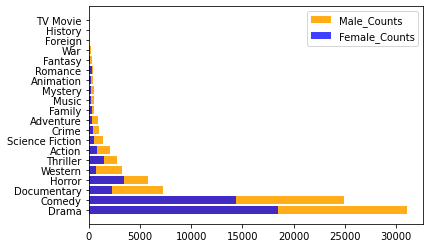


Gender ratio across genres - Producers


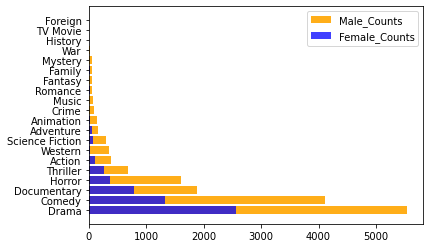


Gender ratio across genres - Directors


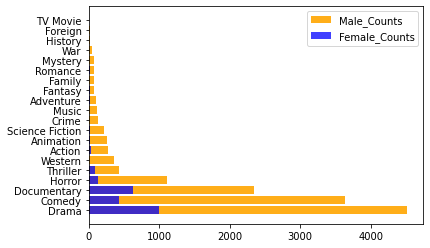


Gender ratio across genres - Writers


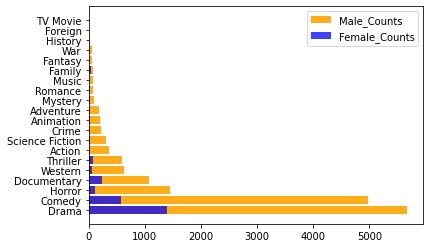

In [14]:
print("\nGender ratio across genres - Actors")
EDA.plotter_special(df = actors_gender_by_genre, col_1 = 'genre', col_2 = 'male_counts', col_3 = 'female_counts', save = 0)

print("\nGender ratio across genres - Producers")
EDA.plotter_special(df = producers_gender_by_genre, col_1 = 'genre', col_2 = 'male_counts', col_3 = 'female_counts', save = 0)

print("\nGender ratio across genres - Directors")
EDA.plotter_special(df = directors_gender_by_genre, col_1 = 'genre', col_2 = 'male_counts', col_3 = 'female_counts', save = 0)

print("\nGender ratio across genres - Writers")
EDA.plotter_special(df = writers_gender_by_genre, col_1 = 'genre', col_2 = 'male_counts', col_3 = 'female_counts', save = 0)

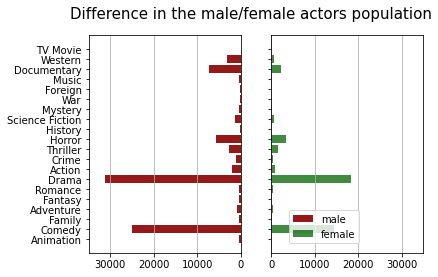

In [18]:
EDA.population_pyramid_plotter(df = actors_gender_by_genre, col_1 = 'genre', col_2 = 'male_counts', col_3 = 'female_counts', population= 'actors')
# EDA.population_pyramid_plotter(directors_gender_decade, 'decade', 'male_counts', 'female_counts', 'directors')
# EDA.population_pyramid_plotter(producers_gender_decade, 'decade', 'male_counts', 'female_counts', 'producers')
# EDA.population_pyramid_plotter(writers_gender_decade, 'decade', 'male_counts', 'female_counts', 'writers')

As the graphs clearly states, a gender difference exists across all genres and fields studied. It is particularly stark in realtion with the position of director.

In relation with the second objective related to the filmmaker population. It becomes clear which genres would be more easily accesible to one of the two genders. Paired that with the billing distribution observed earlier and the position of a female lead (1st billing), becomes quite rare. As  does that of the director (which is in fact advertised as a selling point in some cases).

Therefore, it follows that the colsing of the gap not only constitutes a matter of principle, but one of opportunity. A film that is geared towards a female protagonist and market accordingly has a leg up in the differentiation of the product towards others.

In [15]:
actors_gender_time = EDA.packer_preparer(df = actors[['id', 'gender']], df2 = dates)
directors_gender_time = EDA.packer_preparer(df = directors[['id', 'gender']], df2 = dates)
producers_gender_time = EDA.packer_preparer(df = producers[['id', 'gender']], df2 = dates)
writers_gender_time = EDA.packer_preparer(df = writers[['id', 'gender']], df2 = dates)

actors_gender_time.head()

,id,release_date,runtime,male_counts,female_counts
0,862,1995-10-30,81.0,9,3
1,8844,1995-12-15,104.0,13,12
2,15602,1995-12-22,101.0,3,3
3,31357,1995-12-22,127.0,6,3
4,11862,1995-02-10,106.0,6,5


In [16]:
actors_gender_decade = EDA.plotter_by_decade(actors_gender_time, ['decade', 'male_counts', 'female_counts'], 'decade')
directors_gender_decade = EDA.plotter_by_decade(directors_gender_time, ['decade', 'male_counts', 'female_counts'], 'decade')
producers_gender_decade = EDA.plotter_by_decade(producers_gender_time, ['decade', 'male_counts', 'female_counts'], 'decade')
writers_gender_decade = EDA.plotter_by_decade(writers_gender_time, ['decade', 'male_counts', 'female_counts'], 'decade')

actors_gender_decade

,decade,male_counts,female_counts
0,1870,1,1
1,1890,4,2
2,1900,36,30
3,1910,878,403
4,1920,2406,1177
5,1930,14662,5365
6,1940,17150,6282
7,1950,15461,6354
8,1960,17048,7772
9,1970,22175,10222


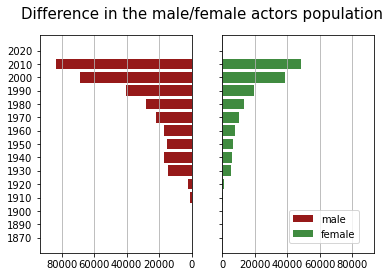

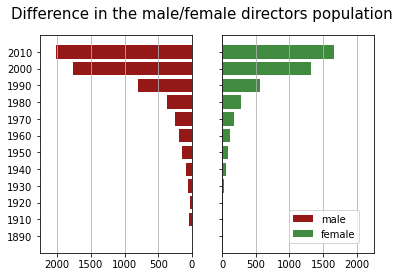

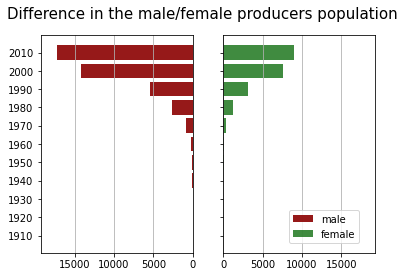

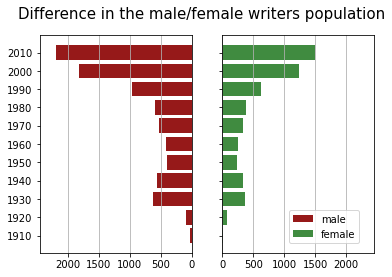

In [17]:
EDA.population_pyramid_plotter(actors_gender_decade, 'decade', 'male_counts', 'female_counts', 'actors')
EDA.population_pyramid_plotter(directors_gender_decade, 'decade', 'male_counts', 'female_counts', 'directors')
EDA.population_pyramid_plotter(producers_gender_decade, 'decade', 'male_counts', 'female_counts', 'producers')
EDA.population_pyramid_plotter(writers_gender_decade, 'decade', 'male_counts', 'female_counts', 'writers')

The population pyramids present an expected picture: as cinema evolves, the number of people involved in its development increases. This can be observed in the decade appereances of the roles. Producers and Writers first appereance is around the 1910's, while directors and actors roles where created much earlier.

As a curious note, this set of graphs also show the initial phases of movie production, as the upcoming 2020 and beyond projects have stars already attached to the movie, while other fields do not. It is not possible and meaningless to determine which films may that be, though the probability of them being part of a franchise is high.

Sadly the trend observed earlier continues in all of the investigated fields. Whilst the difference is less acute in the writing and directing departments, both the actors and producers fields show a high levels of inequality. Women are hugely underrepresented in those fields regardless of time.
